In [13]:
#'S종가', 'H종가', '환율', '유가종가', '유가오픈', '유가고가', '유가저가', '유가변동률', '한국기준금리', '미국기준금리', '한미기준금리차이', '반도체수출금액지수', 'SOX종가', 'SOX변동률', 'BTC종가', 'BTC변동률', '코스피종가', '코스피고가', '코스피저가', '코스피거래량', '코스피변동', '코스닥종가', '코스닥시가', '코스닥고가', '코스닥저가', '코스닥거래량', '코스닥변동', 'SP종가', 'SP변동률', '시장금리'
!pip install sklearn

In [16]:
import matplotlib.font_manager as fm

# 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['cmss10',
 'STIXSizeFourSym',
 'STIXSizeFiveSym',
 'STIXSizeThreeSym',
 'DejaVu Sans',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'cmsy10',
 'cmtt10',
 'DejaVu Sans',
 'cmb10',
 'STIXGeneral',
 'DejaVu Sans',
 'cmr10',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'STIXSizeOneSym',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'STIXGeneral',
 'STIXNonUnicode',
 'DejaVu Sans Display',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'DejaVu Serif Display',
 'STIXSizeFourSym',
 'STIXNonUnicode',
 'DejaVu Serif',
 'STIXNonUnicode',
 'cmex10',
 'STIXSizeTwoSym',
 'cmmi10',
 'STIXGeneral',
 'DejaVu Serif',
 'DejaVu Serif',
 'Chiller',
 'Arial',
 'Dubai',
 'Georgia',
 'Sitka Small',
 'Garamond',
 'Snap ITC',
 'Bookman Old Style',
 'HYMyeongJo-Extra',
 'Javanese Text',
 'Verdana',
 'Franklin Gothic Medium Cond',
 'Algerian',
 'Palatino Linotype',
 'New Gulim',
 'Calibri',
 'Microsoft JhengHei',
 'Microsoft New Tai Lue',
 'Arial',
 'Candara',
 'Symbol',
 'Playbi

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from scipy.spatial.distance import pdist, squareform
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('hynix_long.csv', encoding='UTF-8', index_col = '날짜')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 2001 to 2020
Data columns (total 26 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   S종가          20 non-null     int64  
 1   S/ROE        20 non-null     float64
 2   S/ROA        20 non-null     float64
 3   S/영업이익       20 non-null     float64
 4   S/당기순이익      20 non-null     float64
 5   H종가          20 non-null     int64  
 6   H등락률         20 non-null     float64
 7   H시가          20 non-null     int64  
 8   H고가          20 non-null     int64  
 9   H저가          20 non-null     int64  
 10  H거래량         20 non-null     int64  
 11  H거래대금        20 non-null     float64
 12  H시가총액        20 non-null     float64
 13  H상장주식수       20 non-null     int64  
 14  H/ROA        20 non-null     float64
 15  H/ROE        20 non-null     float64
 16  H주당배당금       20 non-null     int64  
 17  H배당수익률       20 non-null     float64
 18  H배당금총액       20 non-null     float64
 19  H/당기순

## 상관계수 확인

In [3]:
Ldata = Ldata[['S종가', 'H종가', 'S/ROE', 'S/영업이익', 'S/ROA', 'S/당기순이익','H/ROE', 'H/영업이익', 'H/ROA', 'H/당기순이익']]

In [5]:
Ldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 2001 to 2020
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   S종가      20 non-null     int64  
 1   H종가      20 non-null     int64  
 2   S/ROE    20 non-null     float64
 3   S/영업이익   20 non-null     float64
 4   S/ROA    20 non-null     float64
 5   S/당기순이익  20 non-null     float64
 6   H/ROE    20 non-null     float64
 7   H/영업이익   20 non-null     float64
 8   H/ROA    20 non-null     float64
 9   H/당기순이익  20 non-null     float64
dtypes: float64(8), int64(2)
memory usage: 1.7 KB


In [61]:
li = ['S종가', 'H종가', 'S/ROE', 'S/영업이익', 'S/ROA', 'S/당기순이익','H/ROE', 'H/영업이익', 'H/ROA', 'H/당기순이익']

for x in li:
    a = pd.Series(Ldata[x])
    Ldata[x].iloc[1:] = np.diff(a)

c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [62]:
data_corr = pd.DataFrame(Ldata).corr(method='pearson')
data_corr.describe()

,S종가,H종가,S/ROE,S/영업이익,S/ROA,S/당기순이익,H/ROE,H/영업이익,H/ROA,H/당기순이익
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.483197,0.209566,0.524001,0.636851,0.581446,0.643172,0.510695,0.214025,0.621788,0.632418
std,0.323386,0.305691,0.329236,0.318063,0.339599,0.324871,0.284492,0.357043,0.264238,0.261396
min,-0.063981,-0.099893,-0.002411,0.037889,-0.023324,0.029510,-0.032111,-0.099893,0.254283,0.307559
25%,0.253852,0.055052,0.432638,0.471280,0.547540,0.497335,0.421784,-0.018096,0.420028,0.433255
50%,0.485020,0.170053,0.520041,0.747199,0.591714,0.772158,0.537578,0.033700,0.632132,0.611972
75%,0.717202,0.244049,0.664046,0.808166,0.775460,0.798216,0.661402,0.326656,0.770743,0.815128
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [63]:
data_corr

,S종가,H종가,S/ROE,S/영업이익,S/ROA,S/당기순이익,H/ROE,H/영업이익,H/ROA,H/당기순이익
S종가,1.000000,0.158537,0.530933,0.750463,0.617421,0.784688,0.200306,-0.063981,0.414491,0.439108
H종가,0.158537,1.000000,0.053919,0.213347,0.058449,0.181570,-0.032111,-0.099893,0.254283,0.307559
S/ROE,0.530933,0.053919,1.000000,0.636713,0.970608,0.673157,0.509149,-0.002411,0.436639,0.431304
S/영업이익,0.750463,0.213347,0.636713,1.000000,0.743936,0.976170,0.416136,0.037889,0.774448,0.819405
S/ROA,0.617421,0.058449,0.970608,0.743936,1.000000,0.785968,0.566007,-0.023324,0.548016,0.547382
S/당기순이익,0.784688,0.181570,0.673157,0.976170,0.785968,1.000000,0.438728,0.029510,0.759627,0.802299
H/ROE,0.200306,-0.032111,0.509149,0.416136,0.566007,0.438728,1.000000,0.615926,0.716248,0.676561
H/영업이익,-0.063981,-0.099893,-0.002411,0.037889,-0.023324,0.029510,0.615926,1.000000,0.330048,0.316480
H/ROA,0.414491,0.254283,0.436639,0.774448,0.548016,0.759627,0.716248,0.330048,1.000000,0.984080
H/당기순이익,0.439108,0.307559,0.431304,0.819405,0.547382,0.802299,0.676561,0.316480,0.984080,1.000000


c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


<Figure size 1584x1584 with 0 Axes>

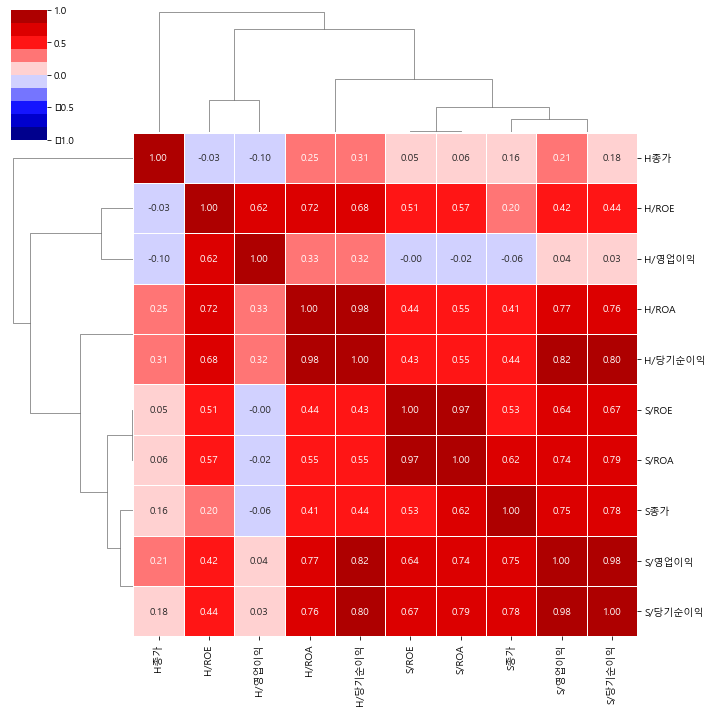

In [64]:
c = sns.color_palette("seismic", 10)
#'RdYlBu_r'
plt.figure(figsize=(22,22))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.clustermap(data_corr, annot=True,vmin = -1, 
               cbar_kws={"shrink": .5},
               vmax = 1, fmt = '.2f', linewidths=.5, cmap = c,metric="correlation")

In [6]:
df = pd.read_csv('hynix_short.csv',index_col=0,parse_dates=[0], dayfirst=False,infer_datetime_format=True,encoding='cp949')

In [7]:
df = df[['S금리대비', 'H금리대비', '코스피변동', '코스닥변동', 'S종가', 'H종가', '유가종가', '한국기준금리', 'SOX변동률', '반도체수출금액지수']]

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2670 entries, 2010-07-19 to 2021-05-14
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   S금리대비      2670 non-null   int64  
 1   H금리대비      2670 non-null   int64  
 2   코스피변동      2670 non-null   float64
 3   코스닥변동      2670 non-null   float64
 4   S종가        2670 non-null   float64
 5   H종가        2670 non-null   float64
 6   유가종가       2670 non-null   float64
 7   한국기준금리     2670 non-null   float64
 8   SOX변동률     2670 non-null   float64
 9   반도체수출금액지수  2670 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 229.5 KB


In [3]:
data_corr = pd.DataFrame(df).corr(method='pearson')
data_corr.describe()

,S금리대비,H금리대비,S등락,H등락,H등락분류,S종가,S등락률,H종가,H대비,H등락률,...,코스피변동,코스닥종가,코스닥시가,코스닥고가,코스닥저가,코스닥거래량,코스닥변동,SP종가,SP변동률,반도체수출금액지수
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,...,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,0.116427,0.143736,0.116427,0.143736,0.150950,0.345600,0.134255,0.349472,0.145671,0.149225,...,0.141513,0.307884,0.303620,0.305129,0.306215,0.319359,0.097781,0.323265,0.027214,0.305761
std,0.254617,0.285165,0.254617,0.285165,0.292539,0.542486,0.256979,0.543611,0.266536,0.284420,...,0.251107,0.547466,0.549120,0.549769,0.546986,0.503122,0.209727,0.574086,0.148787,0.512381
min,-0.039972,-0.022213,-0.039972,-0.022213,-0.013545,-0.770368,-0.019194,-0.760266,-0.026319,-0.030430,...,-0.035069,-0.803508,-0.802662,-0.804376,-0.801389,-0.702585,-0.086073,-0.869226,-0.013364,-0.729989
25%,-0.005254,0.003927,-0.005254,0.003927,0.001092,0.019802,-0.001332,0.006829,0.006061,-0.001512,...,0.002889,0.007586,-0.003487,-0.001420,0.004784,-0.001071,-0.008967,0.010843,0.001331,0.004373
50%,0.006241,0.012003,0.006241,0.012003,0.014638,0.420569,0.009543,0.484164,0.019043,0.009009,...,0.027482,0.384456,0.385287,0.386472,0.385173,0.292197,0.019020,0.452699,0.004011,0.374197
75%,0.061088,0.036207,0.061088,0.036207,0.040481,0.841397,0.061423,0.816707,0.059586,0.052681,...,0.061645,0.813821,0.812522,0.815305,0.811052,0.751290,0.041222,0.862941,0.007586,0.787224
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Figure size 360000x360000 with 0 Axes>

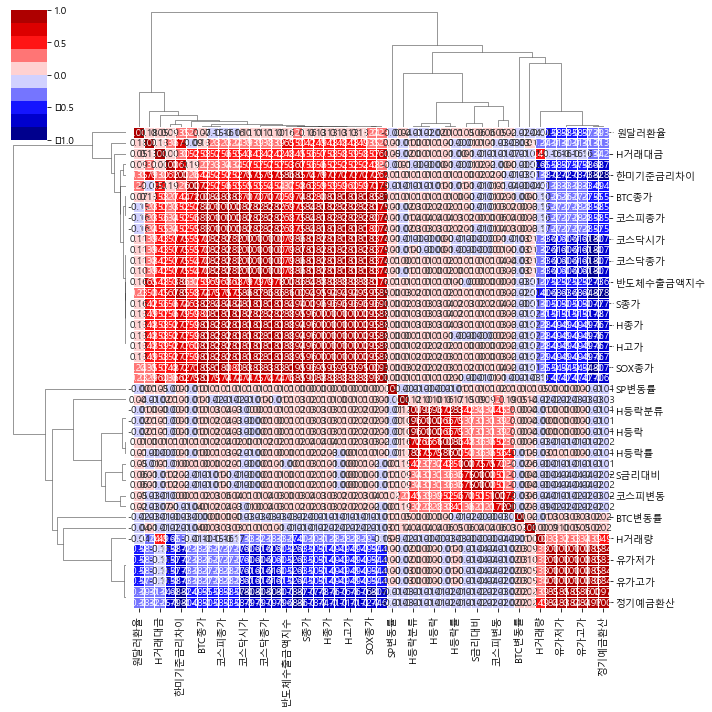

In [6]:
c = sns.color_palette("seismic", 10)
#'RdYlBu_r'
plt.figure(figsize=(5000,5000))
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.clustermap(data_corr, annot=True,vmin = -1, 
               cbar_kws={"shrink": .5},
               vmax = 1, fmt = '.2f', linewidths=.5, cmap = c,metric="correlation")

In [7]:
a = pd.Series(df['종가'])
df['종가'].iloc[1:] = np.diff(a)
b = pd.Series(df['삼성종가'])
df['삼성종가'].iloc[1:] = np.diff(b)
#df['종가'] = np.diff(a) #Error occur

## 차원축소

In [3]:
Sdata = pd.read_csv('hynix_short.csv',index_col=0,parse_dates=[0], dayfirst=False,infer_datetime_format=True,encoding='cp949')
Sdata.head()

,S금리대비,H금리대비,S등락,H등락,H등락분류,S종가,S등락률,H종가,H대비,H등락률,...,코스피변동,코스닥종가,코스닥시가,코스닥고가,코스닥저가,코스닥거래량,코스닥변동,SP종가,SP변동률,반도체수출금액지수
date,,,,,,,,,,,,,,,,,,,,,
2010-07-19,0,1,0,1,1,795000.0,-0.87,23700.0,200,0.85,...,-0.37,498.49,494.36,499.63,494.36,506010.0,-0.08,1071.25,0.88,88.15
2010-07-20,1,1,1,1,1,798000.0,0.38,23850.0,150,0.63,...,0.28,499.72,501.32,501.64,498.43,686750.0,0.25,1083.48,0.80,88.15
2010-07-21,1,0,1,0,-1,817000.0,2.38,23600.0,-250,-1.05,...,0.69,496.73,502.63,503.08,496.73,721150.0,-0.60,1069.59,1.74,88.15
2010-07-22,0,0,0,0,-1,808000.0,-1.10,22600.0,-1000,-4.24,...,-0.76,484.72,496.47,497.84,482.97,668020.0,-2.42,1093.67,-1.40,88.15
2010-07-23,1,1,1,1,1,811000.0,0.37,23250.0,650,2.88,...,1.30,483.69,490.17,490.65,480.66,532190.0,-0.21,1102.66,1.80,88.15


In [27]:
print(Sdata.isna().sum())
print(Sdata.shape)
print(list(Sdata.columns))

S금리대비        0
H금리대비        0
S등락          0
H등락          0
H등락분류        0
S종가          0
S등락률         0
H종가          0
H대비          0
H등락률         0
H시가          0
H고가          0
H저가          0
H거래량         0
H거래대금        0
H시가총액        0
H상장주식수       0
원달러환율        0
유가종가         0
유가오픈         0
유가고가         0
유가저가         0
유가변동률        0
한국기준금리       0
미국기준금리       0
한미기준금리차이     0
정기예금환산       0
SOX종가        0
SOX변동률       0
BTC종가        0
BTC변동률       0
코스피종가        0
코스피고가        0
코스피저가        0
코스피거래량       0
코스피변동        0
코스닥종가        0
코스닥시가        0
코스닥고가        0
코스닥저가        0
코스닥거래량       0
코스닥변동        0
SP종가         0
SP변동률        0
반도체수출금액지수    0
dtype: int64
(2670, 45)
['S금리대비', 'H금리대비', 'S등락', 'H등락', 'H등락분류', 'S종가', 'S등락률', 'H종가', 'H대비', 'H등락률', 'H시가', 'H고가', 'H저가', 'H거래량', 'H거래대금', 'H시가총액', 'H상장주식수', '원달러환율', '유가종가', '유가오픈', '유가고가', '유가저가', '유가변동률', '한국기준금리', '미국기준금리', '한미기준금리차이', '정기예금환산', 'SOX종가', 'SOX변동률', 'BTC종가', 'BTC변동률', '코스피종가', '코스피고가', '코스피저가', '코스피거래량'

In [28]:
Sdata = Sdata.dropna(axis=0)

In [4]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(Sdata.drop(['H등락', 'H금리대비','S금리대비','S등락'], axis=1))

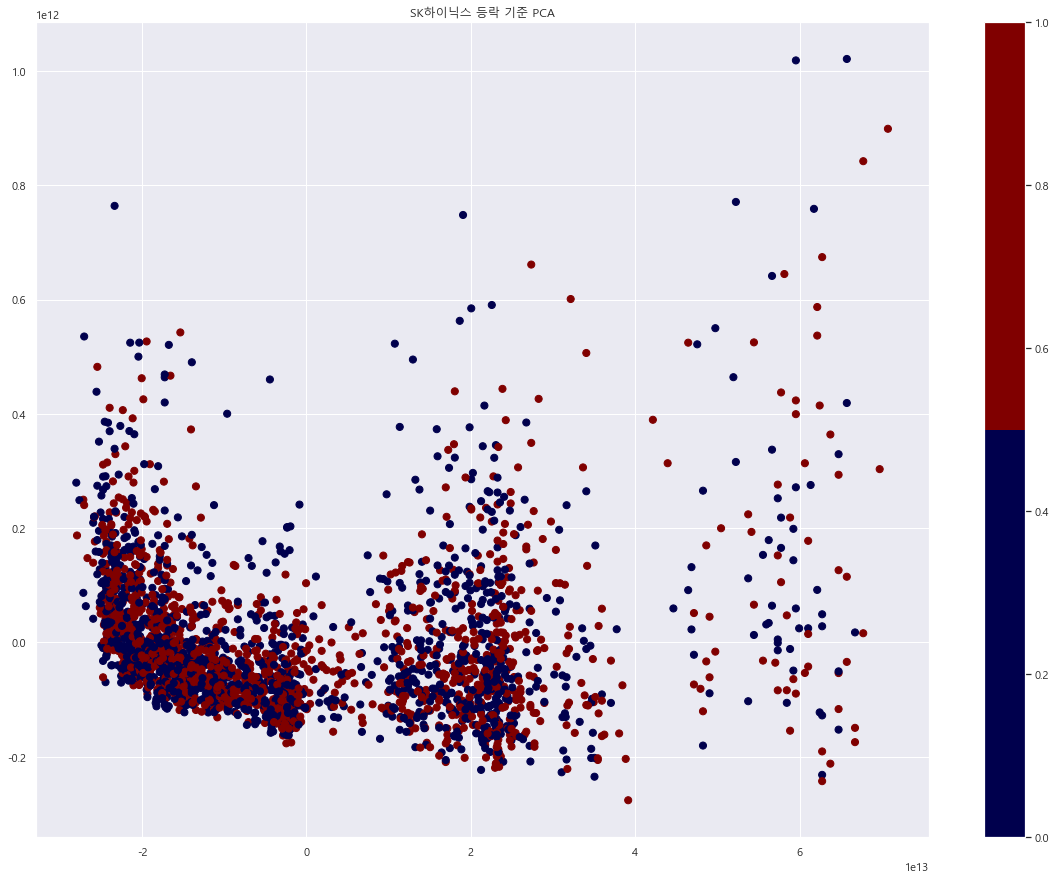

In [21]:
#cubehelix_palette = sns.cubehelix_palette(8, start=2, rot=0.2, dark=0, light=.95,reverse=True, as_cmap=True)
#cmap = sns.cubehelix_palette(as_cmap=True)

f, ax = plt.subplots(figsize=(20,15))
points = ax.scatter(pca_result[:,0], pca_result[:,1], c=Sdata['H등락'], s=50, cmap=plt.cm.get_cmap('seismic', 2))
f.colorbar(points)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 24
plt.title("SK하이닉스 등락 기준 PCA")
plt.show()

In [19]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(Sdata.drop(['H등락', 'H금리대비','S금리대비','S등락'], axis=1))

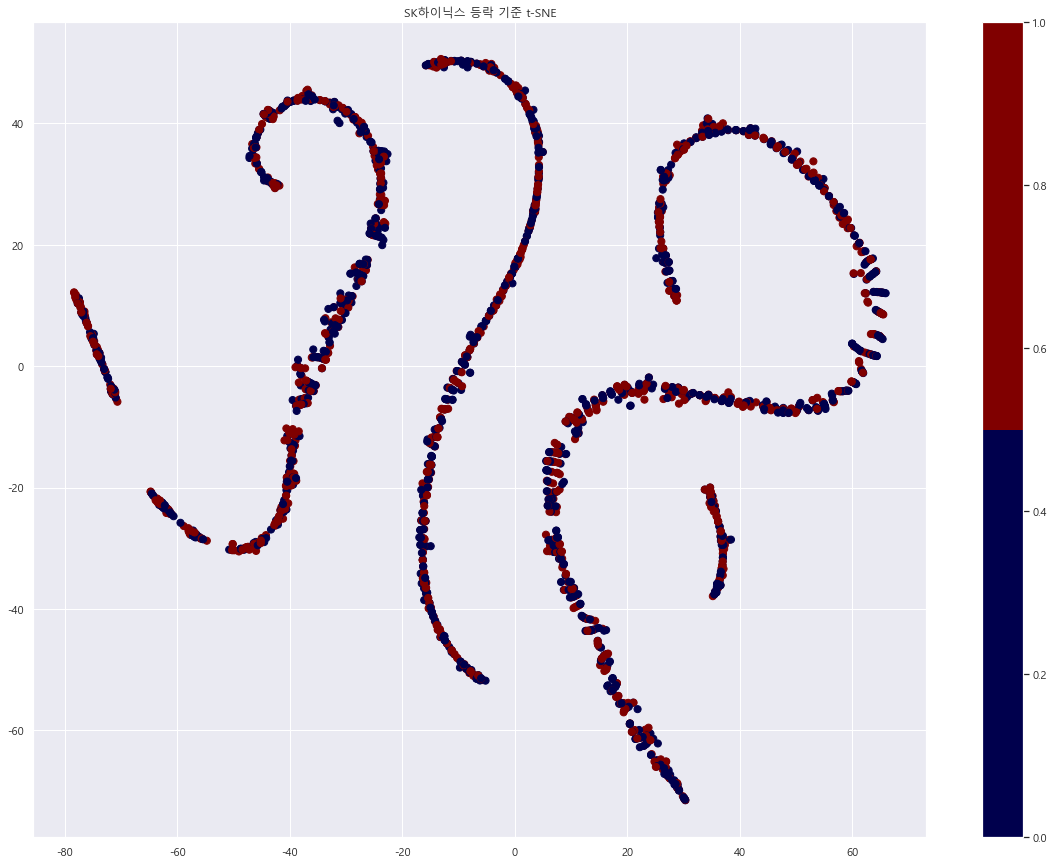

In [20]:
f, ax = plt.subplots(figsize=(20,15))
points = ax.scatter(tsne_result[:,0], tsne_result[:,1], c=Sdata['H등락'], s=50, cmap=plt.cm.get_cmap('seismic', 2))
f.colorbar(points)

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 100
plt.title("SK하이닉스 등락 기준 t-SNE")
plt.show()

## Min-Max-Scailing

In [9]:
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(Sdata)

output = min_max_scaler.transform(Sdata)
output = pd.DataFrame(output, columns = Sdata.columns, index=list(Sdata.index.values))
output.head()

,S금리대비,H금리대비,S등락,H등락,H등락분류,S종가,S등락률,H종가,H대비,H등락률,...,코스피변동,코스닥종가,코스닥시가,코스닥고가,코스닥저가,코스닥거래량,코스닥변동,SP종가,SP변동률,반도체수출금액지수
2010-07-19,0.0,1.0,0.0,1.0,0.75,0.029716,0.387358,0.060948,0.378788,0.485714,...,0.472042,0.142915,0.118507,0.110479,0.144580,0.000057,0.556193,0.007544,0.604607,0.103753
2010-07-20,1.0,1.0,1.0,1.0,0.75,0.030491,0.454889,0.062077,0.376263,0.477551,...,0.510300,0.144891,0.129934,0.113833,0.151132,0.000093,0.571975,0.011383,0.600846,0.103753
2010-07-21,1.0,0.0,1.0,0.0,0.25,0.035401,0.562939,0.060196,0.356061,0.415213,...,0.534432,0.140086,0.132084,0.116236,0.148395,0.000100,0.531325,0.007023,0.645040,0.103753
2010-07-22,0.0,0.0,0.0,0.0,0.25,0.033075,0.374932,0.052671,0.318182,0.296846,...,0.449088,0.120788,0.121971,0.107492,0.126244,0.000089,0.444285,0.014582,0.497414,0.103753
2010-07-23,1.0,1.0,1.0,1.0,0.75,0.033850,0.454349,0.057562,0.401515,0.561039,...,0.570335,0.119133,0.111627,0.095492,0.122525,0.000063,0.549976,0.017405,0.647861,0.103753


In [10]:
#output = output.drop(['S금리대비', 'H금리대비', 'S등락률', 'H등락', 'H대비', 'H등락률', 'H시가', 'H고가', 'H저가', 'H거래량', 'H거래대금', 'H시가총액', 'H상장주식수'], axis=1)

In [11]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(output.drop(['H등락', 'H금리대비','S금리대비','S등락'], axis=1))

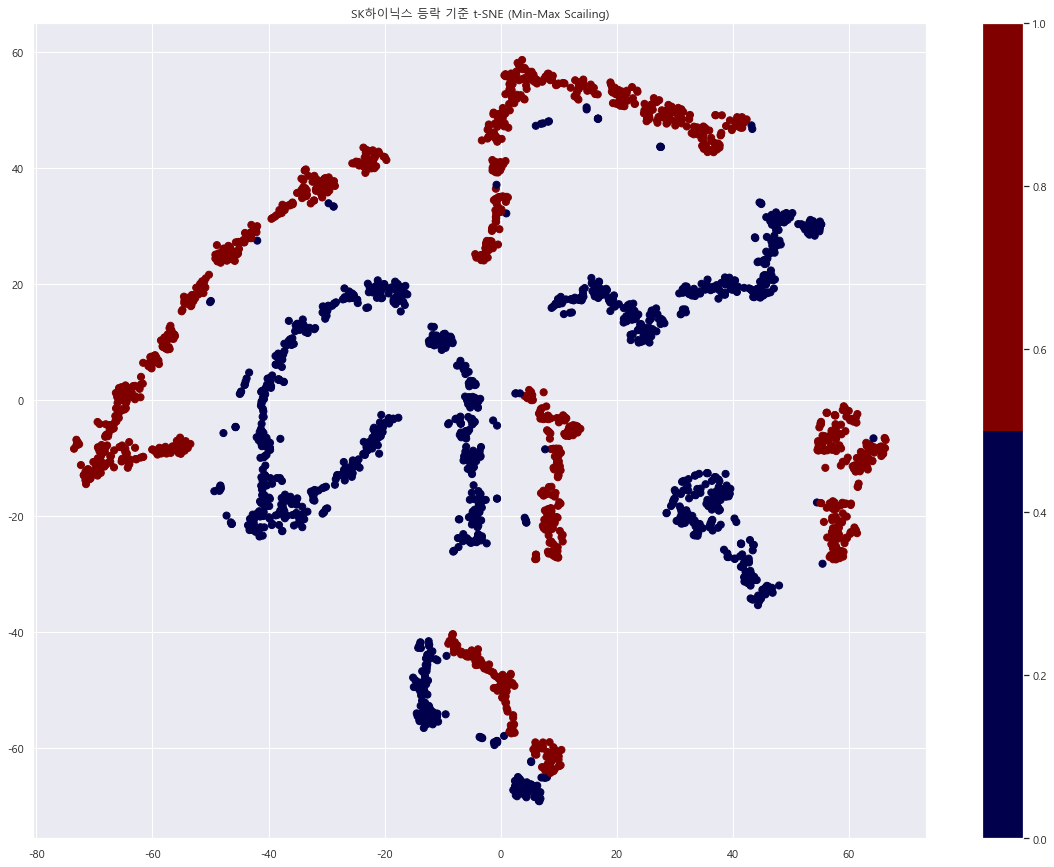

In [18]:
f, ax = plt.subplots(figsize=(20,15))
points = ax.scatter(tsne_result[:,0], tsne_result[:,1], c=Sdata['H등락'], s=50, cmap=plt.cm.get_cmap('seismic', 2))
f.colorbar(points)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 100
plt.title("SK하이닉스 등락 기준 t-SNE (Min-Max Scailing)")
plt.show()

## Standarization

In [22]:
std_scaler = StandardScaler()
fitted = std_scaler.fit(Sdata)

output = std_scaler.transform(Sdata)
output = pd.DataFrame(output, columns = Sdata.columns, index=list(Sdata.index.values))
output.head()

,S금리대비,H금리대비,S등락,H등락,H등락분류,S종가,S등락률,H종가,H대비,H등락률,...,코스피변동,코스닥종가,코스닥시가,코스닥고가,코스닥저가,코스닥거래량,코스닥변동,SP종가,SP변동률,반도체수출금액지수
2010-07-19,-1.002250,1.006011,-1.002250,1.006011,0.921704,-1.255654,-0.546268,-1.007034,0.117198,0.316498,...,-0.380898,-1.069705,-1.113572,-1.087852,-1.082541,-0.643528,-0.084974,-1.534862,0.772965,-0.811856
2010-07-20,0.997755,1.006011,0.997755,1.006011,0.921704,-1.251857,0.176131,-1.001720,0.081558,0.224943,...,0.241394,-1.060266,-1.060055,-1.072530,-1.050904,-0.643261,0.161294,-1.518018,0.699708,-0.811856
2010-07-21,0.997755,-0.994025,0.997755,-0.994025,-0.991943,-1.227810,1.331970,-1.010577,-0.203561,-0.474210,...,0.633917,-1.083211,-1.049982,-1.061553,-1.064119,-0.643210,-0.473031,-1.537148,1.560484,-0.811856
2010-07-22,-1.002250,-0.994025,-1.002250,-0.994025,-0.991943,-1.239200,-0.679190,-1.046003,-0.738159,-1.801767,...,-0.754273,-1.175378,-1.097348,-1.101496,-1.171080,-0.643289,-1.831234,-1.503984,-1.314876,-0.811856
2010-07-23,0.997755,1.006011,0.997755,1.006011,0.921704,-1.235403,0.170352,-1.022976,0.437956,1.161307,...,1.217914,-1.183283,-1.145790,-1.156304,-1.189036,-0.643490,-0.181988,-1.491602,1.615427,-0.811856


In [23]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(output.drop(['H등락', 'H금리대비','S금리대비','S등락'], axis=1))

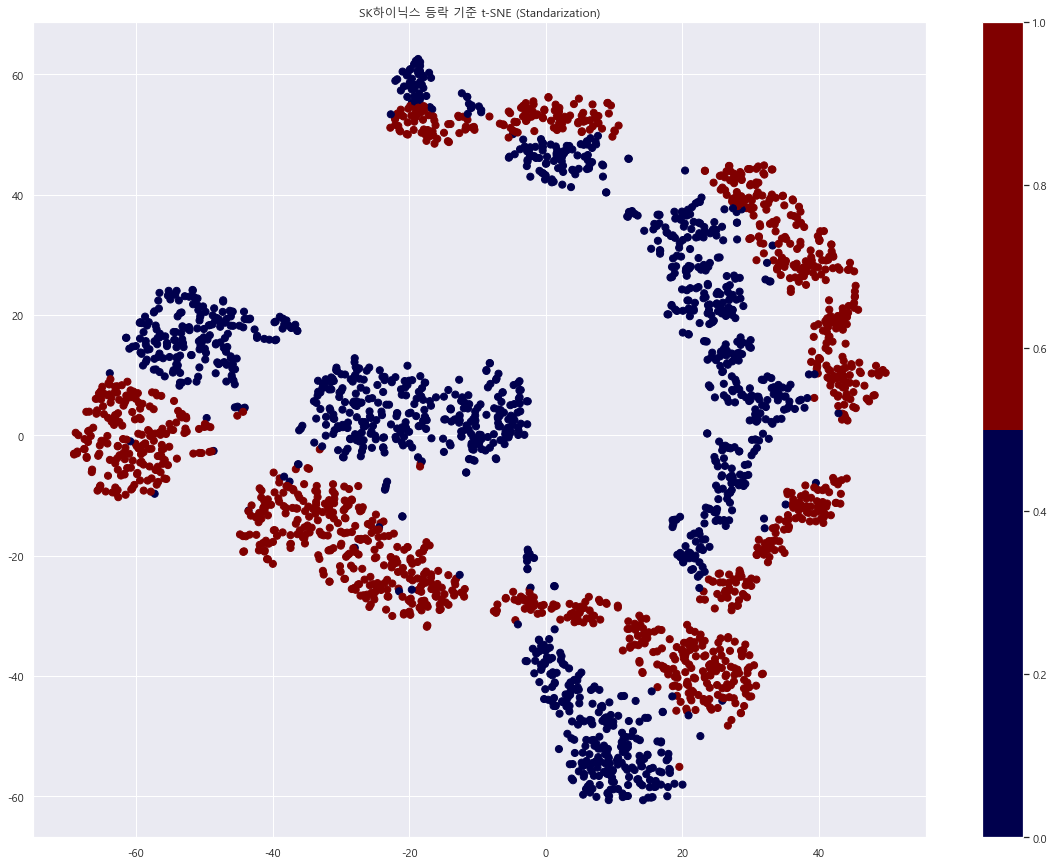

In [24]:
f, ax = plt.subplots(figsize=(20,15))
points = ax.scatter(tsne_result[:,0], tsne_result[:,1], c=Sdata['H등락'], s=50, cmap=plt.cm.get_cmap('seismic', 2))
f.colorbar(points)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 24
plt.title("SK하이닉스 등락 기준 t-SNE (Standarization)")
plt.show()

In [25]:
Sdata = pd.read_csv('hynix_short.csv', encoding='cp949', index_col = 'date')
Sdata.head()

,S금리대비,H금리대비,S등락,H등락,H등락분류,S종가,S등락률,H종가,H대비,H등락률,...,코스피변동,코스닥종가,코스닥시가,코스닥고가,코스닥저가,코스닥거래량,코스닥변동,SP종가,SP변동률,반도체수출금액지수
date,,,,,,,,,,,,,,,,,,,,,
2010-07-19,0,1,0,1,1,795000.0,-0.87,23700.0,200,0.85,...,-0.37,498.49,494.36,499.63,494.36,506010.0,-0.08,1071.25,0.88,88.15
2010-07-20,1,1,1,1,1,798000.0,0.38,23850.0,150,0.63,...,0.28,499.72,501.32,501.64,498.43,686750.0,0.25,1083.48,0.80,88.15
2010-07-21,1,0,1,0,-1,817000.0,2.38,23600.0,-250,-1.05,...,0.69,496.73,502.63,503.08,496.73,721150.0,-0.60,1069.59,1.74,88.15
2010-07-22,0,0,0,0,-1,808000.0,-1.10,22600.0,-1000,-4.24,...,-0.76,484.72,496.47,497.84,482.97,668020.0,-2.42,1093.67,-1.40,88.15
2010-07-23,1,1,1,1,1,811000.0,0.37,23250.0,650,2.88,...,1.30,483.69,490.17,490.65,480.66,532190.0,-0.21,1102.66,1.80,88.15


## 종속변수 분포 확인

<AxesSubplot:title={'center':'H금리대비'}>

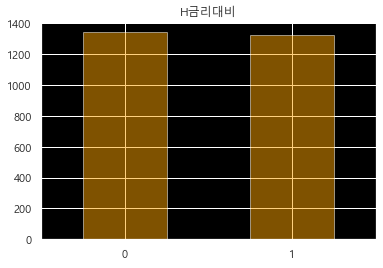

In [31]:
ax = Sdata['H금리대비'].value_counts()
plt.rcParams['axes.facecolor'] = 'black'
ax.plot(kind='bar',  title="H금리대비", color='orange', alpha=0.5, rot=1)

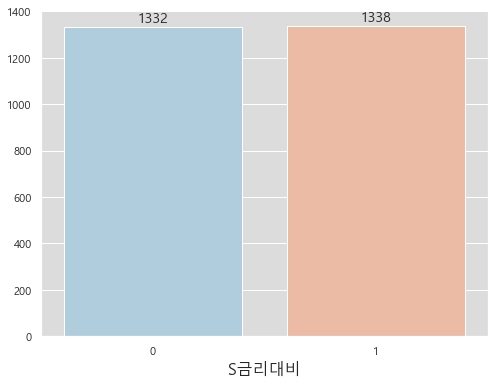

In [48]:
plt.figure(figsize=(8, 6))
palette=sns.color_palette("RdBu_r",2)
plots = sns.countplot(x="S금리대비", data=Sdata, palette = palette)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                   ha='center', va='center',size=14, xytext=(0, 8),textcoords='offset points')

    
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 24
plt.rcParams['axes.facecolor'] = 'gainsboro'
plt.xlabel("S금리대비", size=16)
plt.ylabel("", size=0)
plt.show()

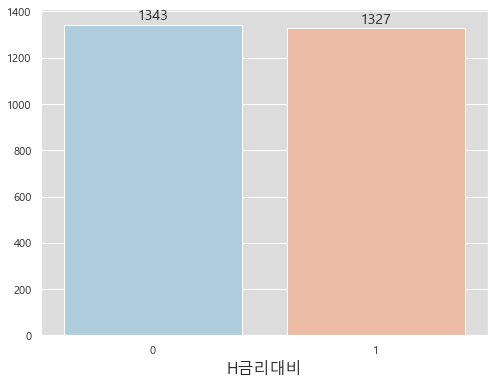

In [44]:
plt.figure(figsize=(8, 6))
palette=sns.color_palette("RdBu_r",2)
plots = sns.countplot(x="H금리대비", data=Sdata, palette = palette)

for bar in plots.patches:plots.annotate(format(bar.get_height()), (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                   ha='center', va='center',size=14, xytext=(0, 8),textcoords='offset points')

plt.xlabel("H금리대비", size=16)
plt.ylabel("", size=0)
plt.show()

## 2020년 3월 23일 포스트 코로나 종속변수 분포 확인

In [14]:
df = Sdata.loc["2020-03-23":]
df.head()

,등락지표,등락 분류,종가,대비,등락률,시가,고가,저가,거래량,거래대금,...,상장주식수,환율,유가종가,유가오픈,유가고가,유가저가,유가변동률,한국은행기준금리,연준기준금리,한미기준금리차이
날짜,,,,,,,,,,,,,,,,,,,,,
2020-03-23,-1,-2,69400,-5400,-7.22,69700,71600,68000,8192363,5.710000e+11,...,728002365,1254.1,23.36,22.52,24.07,20.80,4.15,1.25,0.25,-1.0
2020-03-24,1,2,78700,9300,13.40,73000,78800,72100,7247345,5.490000e+11,...,728002365,1274.6,24.01,23.87,25.16,23.09,2.78,1.25,0.25,-1.0
2020-03-25,1,2,84500,5800,7.37,82000,84700,79800,8787217,7.240000e+11,...,728002365,1256.0,24.49,24.37,25.24,22.91,2.00,1.25,0.25,-1.0
2020-03-26,-1,-1,80700,-3800,-4.50,85000,87900,80400,7895289,6.660000e+11,...,728002365,1230.7,22.60,24.25,24.65,22.38,-7.72,1.25,0.25,-1.0
2020-03-27,1,1,83300,2600,3.22,85700,85700,80500,8085695,6.730000e+11,...,728002365,1227.9,21.51,23.29,23.44,20.88,-4.82,1.25,0.25,-1.0


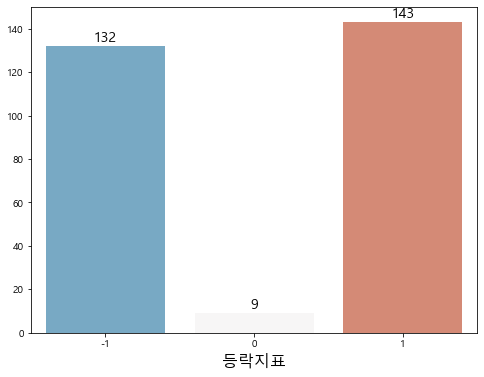

In [21]:
plt.figure(figsize=(8, 6))
palette=sns.color_palette("RdBu_r",3)
plots = sns.countplot(x="등락지표", data=df, palette = palette)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                   ha='center', va='center',size=14, xytext=(0, 8),textcoords='offset points')

plt.xlabel("등락지표", size=16)
plt.ylabel("", size=0)
plt.rcParams['font.family'] = 'NanumGothic'
plt.show()

c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 46973 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47448 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\waudy\appdata\local\programs\python\python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s

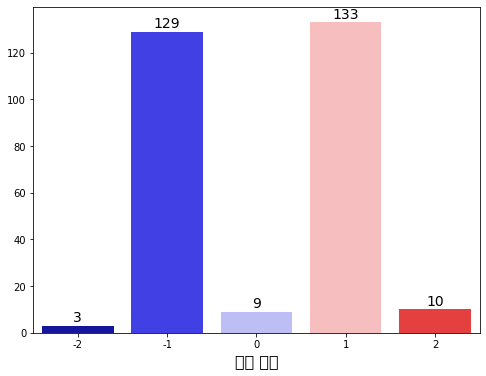

In [27]:
plt.figure(figsize=(8, 6))
palette=sns.color_palette("seismic")
plots = sns.countplot(x="등락 분류", data=df, palette = palette)

for bar in plots.patches:
    plots.annotate(format(bar.get_height()), 
                   (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                   ha='center', va='center',size=14, xytext=(0, 8),textcoords='offset points')


plt.xlabel("등락 분류", size=16)
plt.ylabel("", size=0)
plt.rcParams['font.family'] = 'NanumGothic'
plt.show()